In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.utils import resample, shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Preprocessed_Data.csv')
df.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Residence_Living with Parents,Residence_Others,Residence_Owned,Residence_Rented
0,954457215,48,0,1,2.0,40.0,113,56,0,0,...,0,0,0,0,0,0,0,0,0,1
1,432830445,31,1,1,4.0,55.0,112,46,0,0,...,0,0,0,1,0,1,0,0,0,1
2,941387308,32,1,0,2.0,46.0,104,49,0,0,...,0,0,0,0,0,1,0,0,0,1
3,392161677,43,1,1,1.0,53.0,94,53,0,0,...,0,0,0,0,1,0,0,0,0,1
4,182011211,35,0,1,5.0,44.0,112,43,0,0,...,0,0,0,1,0,0,0,0,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68536 entries, 0 to 68535
Data columns (total 36 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Application ID                                                   68536 non-null  int64  
 1   Age                                                              68536 non-null  int64  
 2   Gender                                                           68536 non-null  int64  
 3   Marital Status (at the time of application)                      68536 non-null  int64  
 4   No of dependents                                                 68536 non-null  float64
 5   Income                                                           68536 non-null  float64
 6   No of months in current residence                                68536 non-null  int64  
 7   No of months in current company         

In [4]:
df.isnull().sum().sort_values(ascending=False)

Application ID                                                     0
Age                                                                0
No of Inquiries in last 12 months (excluding home & auto loans)    0
Presence of open home loan                                         0
Outstanding Balance                                                0
Total No of Trades                                                 0
Presence of open auto loan                                         0
Performance Tag                                                    0
Education_Masters                                                  0
Education_Others                                                   0
Education_Phd                                                      0
Education_Professional                                             0
Profession_SE                                                      0
Profession_SE_PROF                                                 0
Residence_Living with Parents     

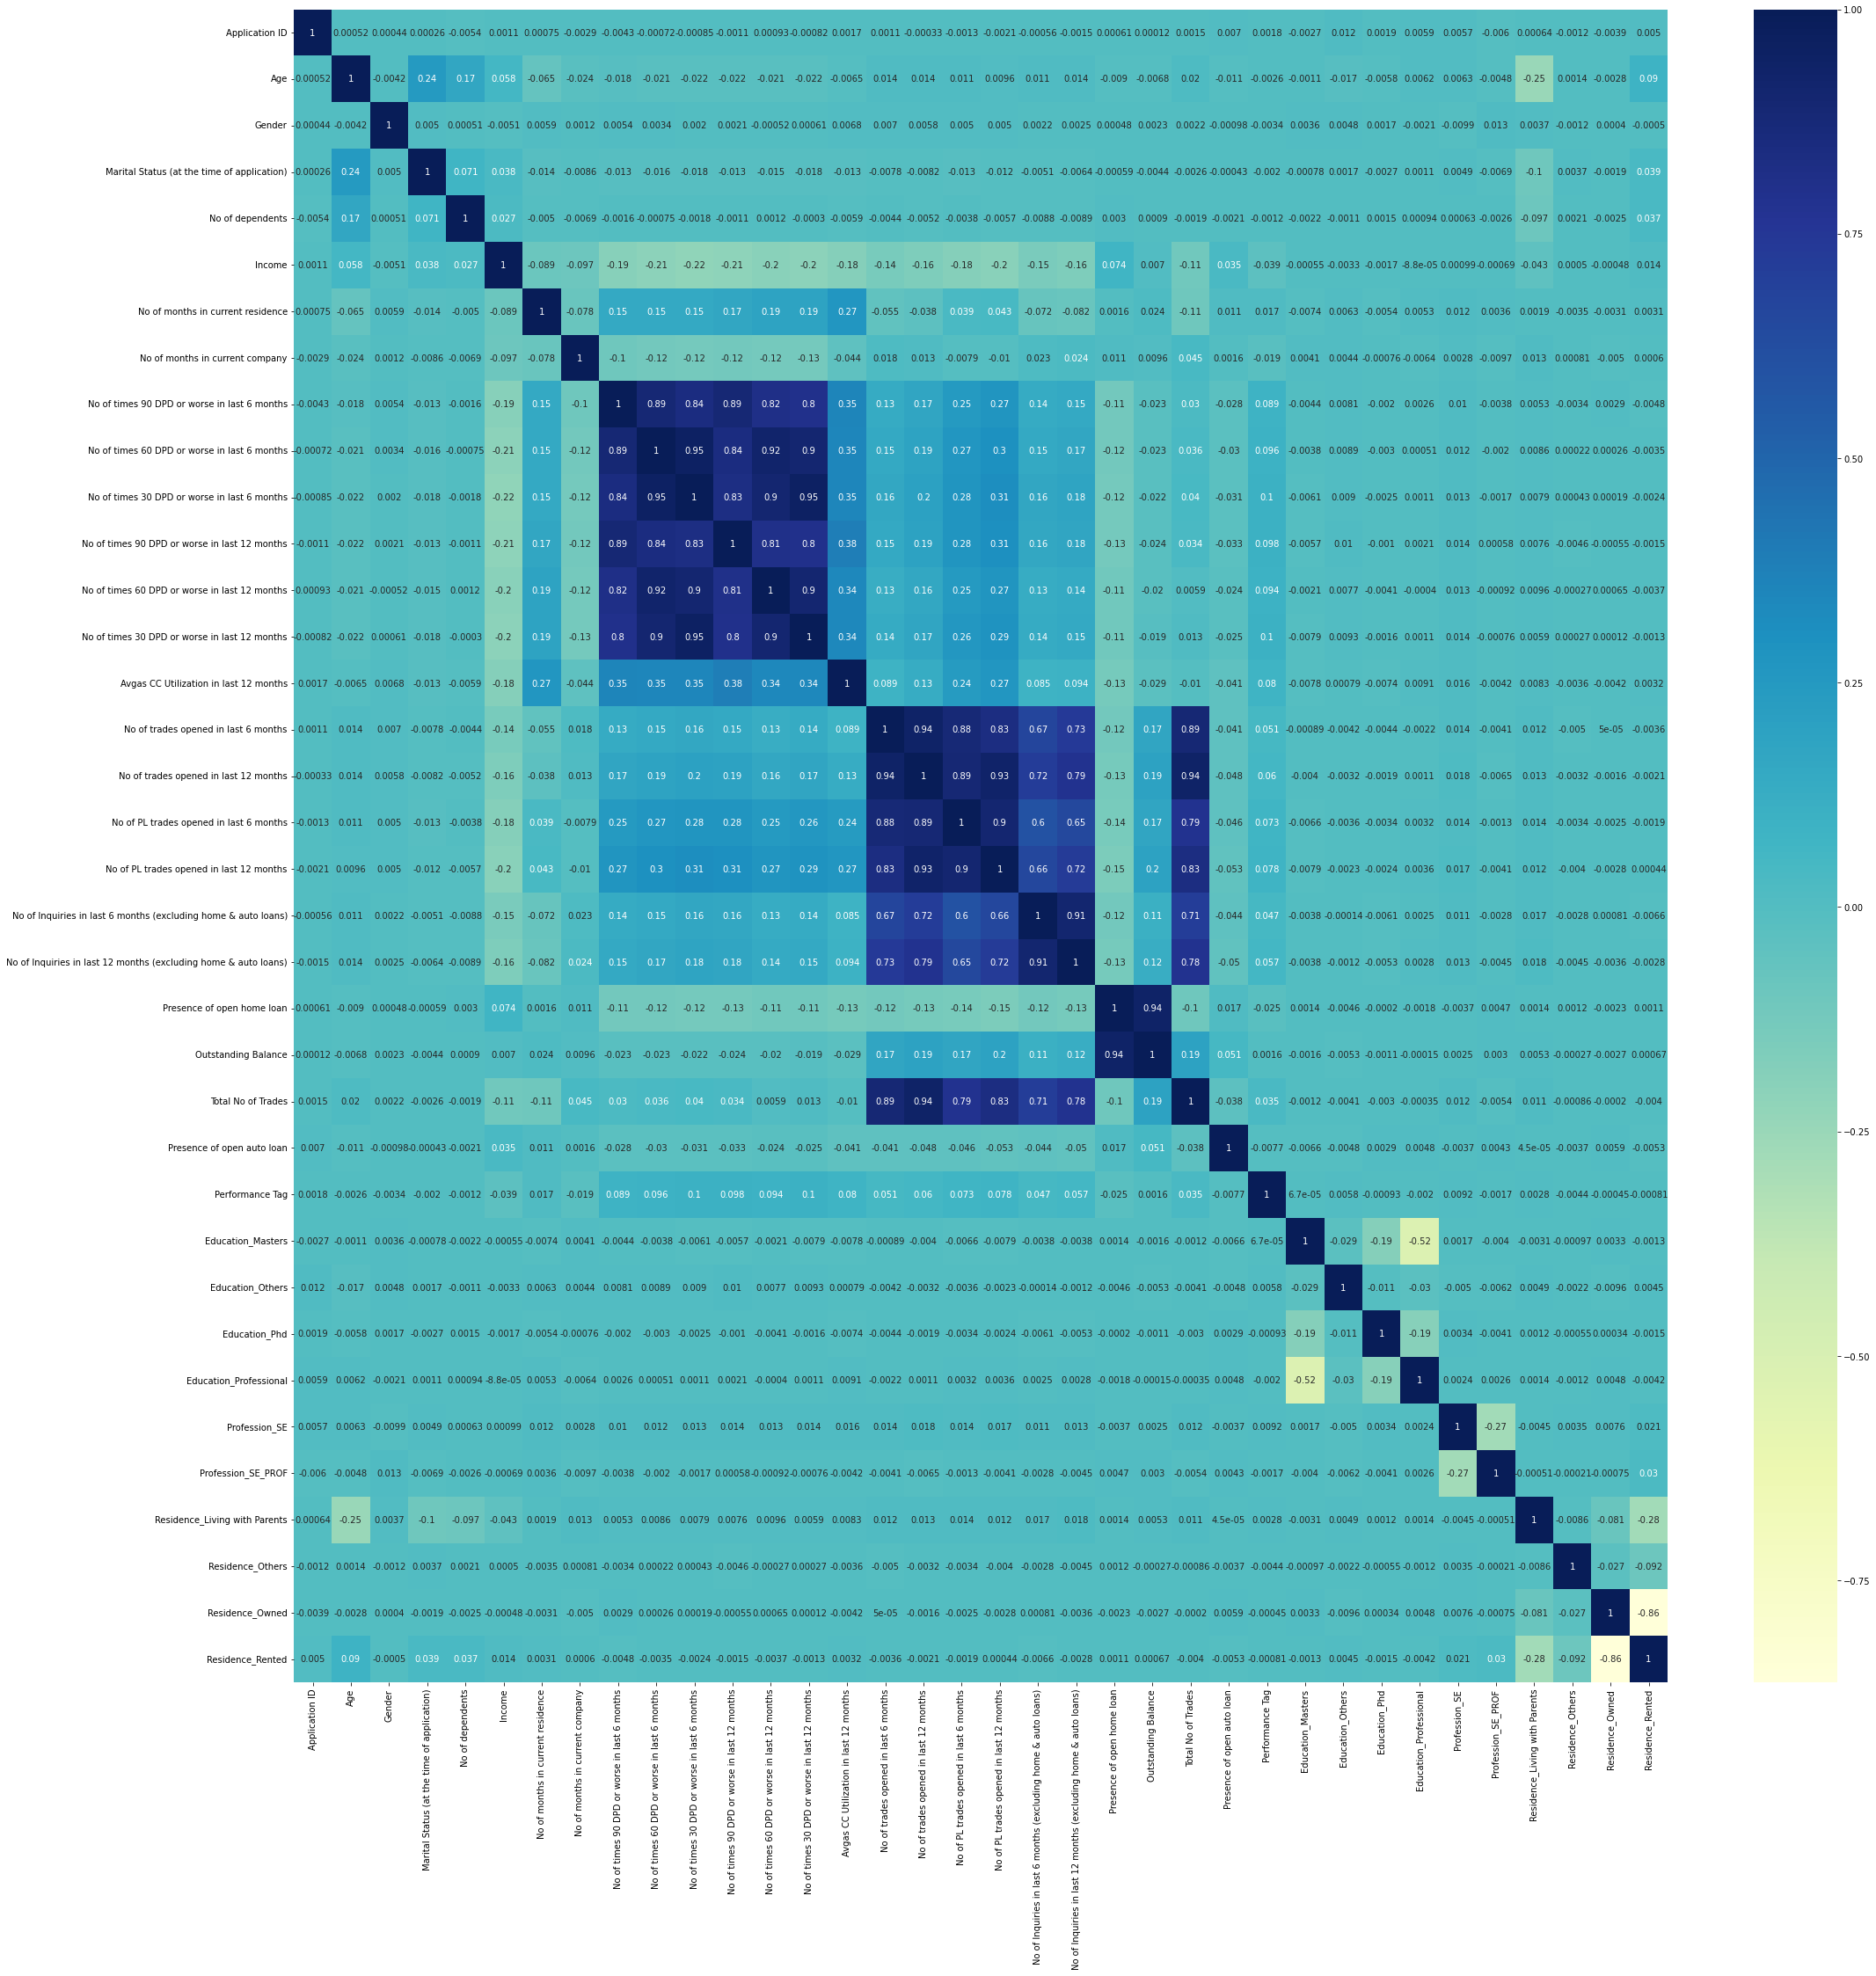

In [5]:
plt.figure(figsize=(35,35))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [6]:
df['Performance Tag'].value_counts()

0.0    65645
1.0     2891
Name: Performance Tag, dtype: int64

In [7]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=100)

In [8]:
df_train.shape

(54828, 36)

In [9]:
df_test.shape

(13708, 36)

In [10]:
y_test = df_test['Performance Tag']
X_test = df_test.loc[:, ~df_test.columns.isin(['Performance Tag'])]

In [11]:
df_train = df_train.drop('Application ID', 1)

In [12]:
df_train['Performance Tag'].sum()/len(df_train)

0.04185817465528562

In [13]:
df_train_1 = df_train[df_train['Performance Tag'] == 1]
df_train_0 = df_train[df_train['Performance Tag'] == 0]

In [14]:
df_train_1.shape

(2295, 35)

In [15]:
df_train_1_upsampled = resample(df_train_1, n_samples=len(df_train_0), replace=True, random_state=100)

In [16]:
df_train_1_upsampled.shape

(52533, 35)

In [17]:
upsampled_df = pd.concat([df_train_0, df_train_1_upsampled])

In [18]:
upsampled_df.shape

(105066, 35)

In [19]:
upsampled_df.head()

,Age,Gender,Marital Status (at the time of application),No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Residence_Living with Parents,Residence_Others,Residence_Owned,Residence_Rented
42882,62,0,1,1.0,5.0,112,5,0,0,0,...,0,0,0,1,1,0,0,0,1,0
36682,34,0,0,2.0,4.5,6,68,0,0,0,...,1,0,0,0,0,0,0,0,0,1
42207,49,1,1,3.0,37.0,62,53,0,0,0,...,0,0,0,1,0,1,0,0,1,0
25358,53,1,1,2.0,49.0,6,59,0,0,0,...,0,0,0,1,0,0,0,0,0,1
19262,45,1,1,2.0,34.0,6,34,0,0,0,...,0,0,0,0,0,1,0,0,0,1


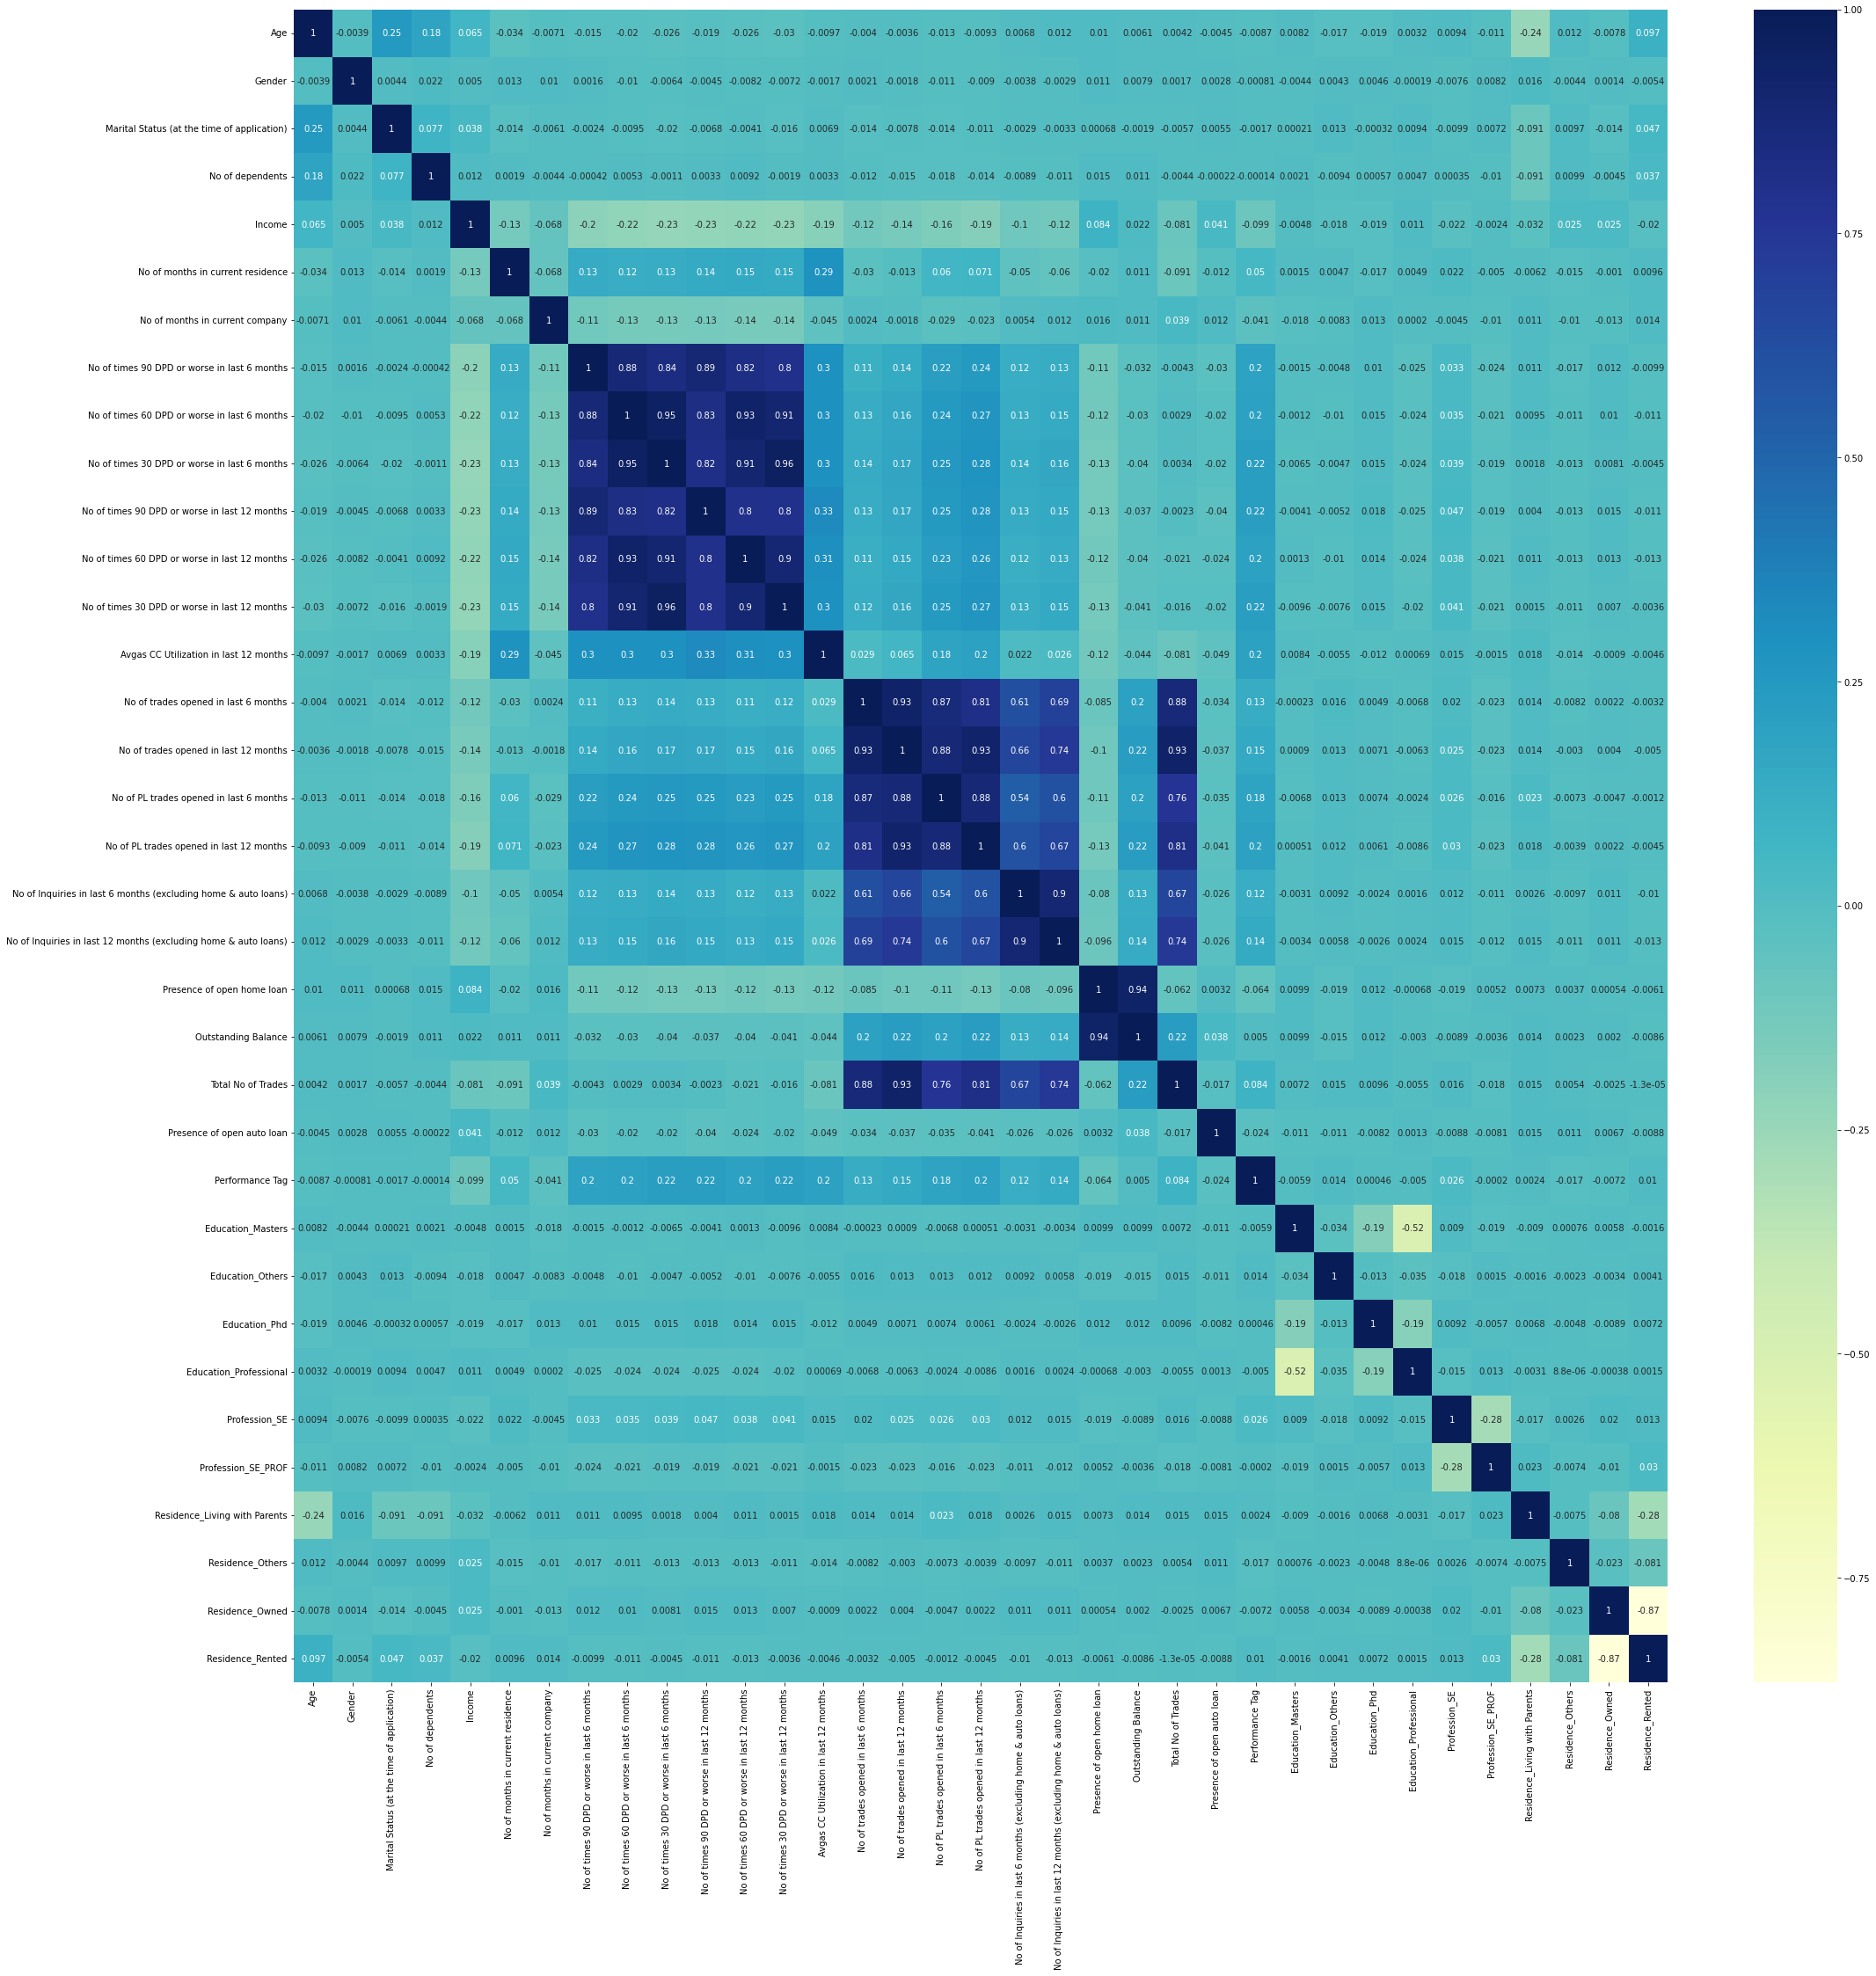

In [20]:
plt.figure(figsize=(35,35))
sns.heatmap(upsampled_df.corr(), annot=True, cmap='YlGnBu')
plt.show()

In [21]:
y_train = upsampled_df['Performance Tag']
X_train = upsampled_df.loc[:, ~upsampled_df.columns.isin(['Performance Tag'])]

In [22]:
X_train.shape

(105066, 34)

In [23]:
y_train.shape

(105066,)

In [24]:
int_vars = ['Age', 'No of dependents', 'Income', 'No of months in current residence', 'No of months in current company', 'No of times 90 DPD or worse in last 6 months', 'No of times 60 DPD or worse in last 6 months', 'No of times 30 DPD or worse in last 6 months', 'No of times 90 DPD or worse in last 12 months', 'No of times 60 DPD or worse in last 12 months', 'No of times 30 DPD or worse in last 12 months', 'Avgas CC Utilization in last 12 months', 'No of trades opened in last 6 months', 'No of trades opened in last 12 months', 'No of PL trades opened in last 6 months', 'No of PL trades opened in last 12 months', 'No of Inquiries in last 6 months (excluding home & auto loans)', 'No of Inquiries in last 12 months (excluding home & auto loans)', 'Outstanding Balance', 'Total No of Trades']

In [25]:
Scaler = StandardScaler()

In [26]:
df_train[int_vars] = Scaler.fit_transform(df_train[int_vars])

In [27]:
df_train[int_vars].describe()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Outstanding Balance,Total No of Trades
count,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04,5.482800e+04
mean,-1.938739e-16,-5.935445e-17,-5.313390e-17,-5.164355e-17,-1.045831e-16,-6.557500e-17,5.261552e-17,6.492703e-17,5.533701e-17,1.594017e-17,5.183795e-18,-1.866166e-17,9.402108e-17,-1.373706e-17,-4.276631e-17,-3.499061e-17,5.870647e-17,-2.773330e-17,-4.159995e-17,1.684733e-17
std,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00,1.000009e+00
min,-2.737429e+00,-1.340433e+00,-1.714942e+00,-7.726261e-01,-1.533448e+00,-4.965541e-01,-5.106526e-01,-5.256004e-01,-5.466527e-01,-5.936723e-01,-5.926115e-01,-9.889854e-01,-1.117107e+00,-1.155870e+00,-8.925662e-01,-9.902605e-01,-8.966895e-01,-9.866080e-01,-9.844757e-01,-1.023706e+00
25%,-7.118452e-01,-6.186727e-01,-8.728738e-01,-7.726261e-01,-8.456721e-01,-4.965541e-01,-5.106526e-01,-5.256004e-01,-5.466527e-01,-5.936723e-01,-5.926115e-01,-7.180771e-01,-6.357883e-01,-7.623365e-01,-8.925662e-01,-9.902605e-01,-8.966895e-01,-9.866080e-01,-8.189207e-01,-7.435994e-01
50%,-2.890894e-03,1.030880e-01,-3.080534e-02,-6.638013e-01,-1.051566e-02,-4.965541e-01,-5.106526e-01,-5.256004e-01,-5.466527e-01,-5.936723e-01,-5.926115e-01,-4.810323e-01,-1.544699e-01,-1.720363e-01,-1.532491e-01,-1.648038e-01,-3.943631e-01,-1.591154e-01,-3.803026e-01,-3.234396e-01
75%,8.073426e-01,8.248487e-01,8.112631e-01,6.965094e-01,8.246407e-01,-4.965541e-01,7.819037e-01,4.706872e-01,7.615915e-01,3.824820e-01,2.098311e-01,5.348738e-01,3.268484e-01,6.150306e-01,5.860681e-01,6.606529e-01,6.102898e-01,3.925464e-01,1.291024e+00,2.367735e-01
max,2.022693e+00,1.546609e+00,2.106753e+00,2.492120e+00,4.853042e+00,5.417653e+00,5.952129e+00,6.448413e+00,5.994568e+00,6.239408e+00,5.826929e+00,2.837594e+00,4.658714e+00,4.353598e+00,3.543337e+00,3.962480e+00,4.126575e+00,4.530010e+00,3.067076e+00,4.998585e+00


In [28]:
lm_1 = sm.GLM(y_train, sm.add_constant(X_train), family=sm.families.Binomial())
lm_1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:               105066
Model:                            GLM   Df Residuals:                   105031
Model Family:                Binomial   Df Model:                           34
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -67801.
Date:                Thu, 20 Jul 2023   Deviance:                   1.3560e+05
Time:                        23:28:41   Pearson chi2:                 1.05e+05
No. Iterations:                     5   Pseudo R-squ. (CS):            0.09122
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -0.6717      0.062    -10.875      0.000      -0.793      -0.551
Age                                                                -0.0012      0.001     -1.754      0.079      -0.003       0.000
Gender                                                              0.0132      0.015      0.867      0.386      -0.017       0.043
Marital Status (at the time of application)                         0.0155      0.019      0.823      0.411      -0.021       0.053
No of dependents                                                    0.0059      0.005      1.245      0.213      -0.003       0.015
Income                                                             -0.0022      0.000     -4.830      0.000      -0.003      -0.001
No of months in current residence                                  -0.0015      0.000     -7.724      0.000      -0.002      -0.001
No of months in current company                                    -0.0016      0.000     -4.865      0.000      -0.002      -0.001
No of times 90 DPD or worse in last 6 months                        0.0217      0.030      0.723      0.470      -0.037       0.081
No of times 60 DPD or worse in last 6 months                       -0.1516      0.032     -4.750      0.000      -0.214      -0.089
No of times 30 DPD or worse in last 6 months                        0.1699      0.027      6.408      0.000       0.118       0.222
No of times 90 DPD or worse in last 12 months                       0.1472      0.017      8.440      0.000       0.113       0.181
No of times 60 DPD or worse in last 12 months                      -0.0374      0.017     -2.239      0.025      -0.070      -0.005
No of times 30 DPD or worse in last 12 months                       0.0767      0.017      4.621      0.000       0.044       0.109
Avgas CC Utilization in last 12 months                              0.0083      0.000     33.026      0.000       0.008       0.009
No of trades opened in last 6 months                                0.0022      0.011      0.203      0.839      -0.019       0.023
No of trades opened in last 12 months                              -0.0281      0.008     -3.466      0.001      -0.044      -0.012
No of PL trades opened in last 6 months                             0.0714      0.013      5.669      0.000       0.047       0.096
No of PL trades opened in last 12 months                            0.2008      0.021      9.411      0.000       0.159       0.243
No of Inquiries in last 6 months (excluding home & auto loans)     -0.0422      0.007     -5.635      0.000      -0.057      -0.028
No of Inquiries in last 12 months (excluding ho

In [29]:
logreg = LogisticRegression()

In [30]:
rfe = RFE(logreg, n_features_to_select=10)


In [31]:
rfe = rfe.fit(X_train, y_train)

In [32]:
print(rfe.support_)

[False False False False False False False False  True  True  True False
 False False False False False  True False False  True False False  True
 False  True False False  True False False  True False  True]


In [33]:
print(rfe.ranking_)

[18 15 11 20 19 23 22 21  1  1  1 12  6 16 17 10  2  1  7  4  1 24  3  1
 13  1 25 14  1  5  8  1  9  1]


In [34]:
X_train.columns[rfe.support_]

Index(['No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of PL trades opened in last 12 months',
       'Presence of open home loan', 'Presence of open auto loan',
       'Education_Others', 'Profession_SE', 'Residence_Others',
       'Residence_Rented'],
      dtype='object')

In [35]:
col = X_train.columns[rfe.support_]

In [36]:
lm_2 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
lm_2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:               105066
Model:                            GLM   Df Residuals:                   105055
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68860.
Date:                Thu, 20 Jul 2023   Deviance:                   1.3772e+05
Time:                        23:29:19   Pearson chi2:                 1.05e+05
No. Iterations:                     5   Pseudo R-squ. (CS):            0.07272
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6490      0.017    -39.197      0.000      -0.681      -0.617
No of times 60 DPD or worse in last 6 months     -0.2048      0.025     -8.316      0.000      -0.253      -0.157
No of times 30 DPD or worse in last 6 months      0.3152      0.018     17.126      0.000       0.279       0.351
No of times 90 DPD or worse in last 12 months     0.2622      0.014     19.334      0.000       0.236       0.289
No of PL trades opened in last 12 months          0.1246      0.003     43.751      0.000       0.119       0.130
Presence of open home loan                       -0.0978      0.015     -6.424      0.000      -0.128      -0.068
Presence of open auto loan                       -0.0921      0.024     -3.868      0.000      -0.139      -0.045
Education_Others                                  0.5728      0.137      4.194      0.000       0.305       0.841
Profession_SE                                     0.0691      0.016      4.377      0.000       0.038       0.100
Residence_Others                                 -0.6223      0.147     -4.235      0.000      -0.910      -0.334
Residence_Rented                                  0.0545      0.015      3.654      0.000       0.025       0.084
=================================================================================================================
"""

In [37]:
def vif_fn(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending=False)
    return vif

In [38]:
vif_fn(X_train[col])

,Features,VIF
0,No of times 60 DPD or worse in last 6 months,15.74
1,No of times 30 DPD or worse in last 6 months,15.24
2,No of times 90 DPD or worse in last 12 months,4.76
3,No of PL trades opened in last 12 months,2.19
9,Residence_Rented,2.16
4,Presence of open home loan,1.23
7,Profession_SE,1.23
5,Presence of open auto loan,1.07
6,Education_Others,1.00
8,Residence_Others,1.00


In [39]:
col = col.drop('No of times 60 DPD or worse in last 6 months')

In [40]:
col

Index(['No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of PL trades opened in last 12 months',
       'Presence of open home loan', 'Presence of open auto loan',
       'Education_Others', 'Profession_SE', 'Residence_Others',
       'Residence_Rented'],
      dtype='object')

In [41]:
lm_3 = sm.GLM(y_train, sm.add_constant(X_train[col]), family=sm.families.Binomial())
lm_3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:               105066
Model:                            GLM   Df Residuals:                   105056
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -68895.
Date:                Thu, 20 Jul 2023   Deviance:                   1.3779e+05
Time:                        23:29:21   Pearson chi2:                 1.06e+05
No. Iterations:                     5   Pseudo R-squ. (CS):            0.07211
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -0.6481      0.017    -39.153      0.000      -0.680      -0.616
No of times 30 DPD or worse in last 6 months      0.1861      0.010     18.969      0.000       0.167       0.205
No of times 90 DPD or worse in last 12 months     0.2291      0.013     17.692      0.000       0.204       0.254
No of PL trades opened in last 12 months          0.1248      0.003     43.834      0.000       0.119       0.130
Presence of open home loan                       -0.1014      0.015     -6.658      0.000      -0.131      -0.072
Presence of open auto loan                       -0.0937      0.024     -3.933      0.000      -0.140      -0.047
Education_Others                                  0.5886      0.136      4.321      0.000       0.322       0.856
Profession_SE                                     0.0710      0.016      4.499      0.000       0.040       0.102
Residence_Others                                 -0.6289      0.147     -4.278      0.000      -0.917      -0.341
Residence_Rented                                  0.0563      0.015      3.773      0.000       0.027       0.085
=================================================================================================================
"""

In [42]:
vif_fn(X_train[col])

,Features,VIF
1,No of times 90 DPD or worse in last 12 months,4.37
0,No of times 30 DPD or worse in last 6 months,4.30
2,No of PL trades opened in last 12 months,2.19
8,Residence_Rented,2.16
3,Presence of open home loan,1.23
6,Profession_SE,1.23
4,Presence of open auto loan,1.07
5,Education_Others,1.00
7,Residence_Others,1.00


In [43]:
logsk = LogisticRegression()
logsk.fit(X_train[col], y_train)

LogisticRegression()

In [44]:
y_pred = logsk.predict_proba(X_test[col])

In [95]:
y_pred_df = pd.DataFrame(y_pred)
y_pred_df.head()

,0,1
0,0.523116,0.476884
1,0.554115,0.445885
2,0.656610,0.343390
3,0.349214,0.650786
4,0.656610,0.343390


In [96]:
y_pred_1 = y_pred_df.iloc[:, 1]

In [97]:
y_pred_1.head()

0    0.476884
1    0.445885
2    0.343390
3    0.650786
4    0.343390
Name: 1, dtype: float64

In [98]:
y_test_df = pd.DataFrame(y_test)

In [99]:
y_test_df['Application ID'] = y_test_df.index

In [100]:
y_test_df.head()

,Performance Tag,Application ID
41215,0.0,41215
47716,0.0,47716
18794,0.0,18794
56540,0.0,56540
18540,0.0,18540


In [101]:
y_test_df.reset_index(drop=True, inplace=True)

In [102]:
y_test_df.head()

,Performance Tag,Application ID
0,0.0,41215
1,0.0,47716
2,0.0,18794
3,0.0,56540
4,0.0,18540


In [103]:
y_pred_1.reset_index(drop=True, inplace=True)

In [104]:
y_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [105]:
y_pred_final.head()

,Performance Tag,Application ID,1
0,0.0,41215,0.476884
1,0.0,47716,0.445885
2,0.0,18794,0.343390
3,0.0,56540,0.650786
4,0.0,18540,0.343390


In [106]:
y_pred_final = y_pred_final.rename(columns={1: 'Performance_Prob'})

In [107]:
y_pred_final.head()

,Performance Tag,Application ID,Performance_Prob
0,0.0,41215,0.476884
1,0.0,47716,0.445885
2,0.0,18794,0.343390
3,0.0,56540,0.650786
4,0.0,18540,0.343390


In [108]:
y_pred_final = y_pred_final.reindex(['Application ID', 'Performance Tag', 'Performance_Prob'], axis=1)

In [109]:
y_pred_final.head()

,Application ID,Performance Tag,Performance_Prob
0,41215,0.0,0.476884
1,47716,0.0,0.445885
2,18794,0.0,0.343390
3,56540,0.0,0.650786
4,18540,0.0,0.343390


In [111]:
y_pred_final['predicted'] = y_pred_final['Performance_Prob'].apply(lambda x:1 if x>0.5 else 0)

In [112]:
y_pred_final.head()

,Application ID,Performance Tag,Performance_Prob,predicted
0,41215,0.0,0.476884,0
1,47716,0.0,0.445885,0
2,18794,0.0,0.343390,0
3,56540,0.0,0.650786,1
4,18540,0.0,0.343390,0


In [113]:
confusion = metrics.confusion_matrix(y_pred_final['Performance Tag'], y_pred_final['predicted'])

In [114]:
confusion

array([[8186, 4926],
       [ 231,  365]], dtype=int64)

In [115]:
metrics.accuracy_score(y_pred_final['Performance Tag'], y_pred_final['predicted'])

0.6237963233148527

In [116]:
metrics.recall_score(y_pred_final['Performance Tag'], y_pred_final['predicted'])

0.6124161073825504

In [117]:
metrics.precision_score(y_pred_final['Performance Tag'], y_pred_final['predicted'])

0.06898506898506898

In [118]:
metrics.f1_score(y_pred_final['Performance Tag'], y_pred_final['predicted'])

0.12400203838967215

In [119]:
metrics.roc_auc_score(y_pred_final['Performance Tag'], y_pred_final['predicted'])

0.6183648566198903

In [128]:
fpr, tpr, thresh = metrics.roc_curve(y_pred_final['Performance Tag'], y_pred_final['predicted'])

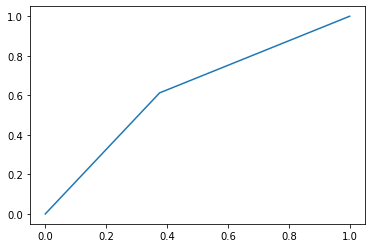

In [129]:
plt.plot(fpr, tpr)
plt.show()

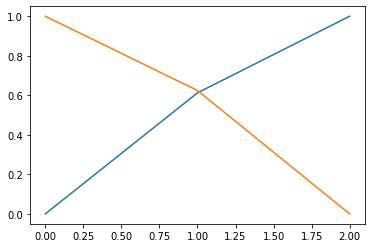

In [130]:
plt.plot(tpr)
plt.plot(1-fpr)
plt.show()

In [136]:
[i/10 for i in range(1,10,1)]

[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [139]:
cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensi', 'speci'])
num = [i/10 for i in range(1,10,1)]
for i in num:
    cm = metrics.confusion_matrix(y_pred_final['Performance Tag'], y_pred_final['Performance_Prob'] > i)
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    sensi = cm[1,1] / (cm[1,1] + cm[1,0])
    speci = cm[0,0] / (cm[0,0] + cm[0,1])
    
    cutoff_df.loc[i] = [i, accuracy, sensi, speci]

print(cutoff_df)

     prob  accuracy     sensi     speci
0.1   0.1  0.043478  1.000000  0.000000
0.2   0.2  0.043478  1.000000  0.000000
0.3   0.3  0.045083  1.000000  0.001678
0.4   0.4  0.461263  0.822148  0.444860
0.5   0.5  0.623796  0.612416  0.624314
0.6   0.6  0.801576  0.340604  0.822529
0.7   0.7  0.909396  0.105705  0.945927
0.8   0.8  0.949446  0.025168  0.991458
0.9   0.9  0.956303  0.000000  0.999771


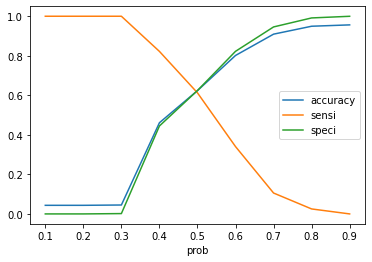

In [143]:
cutoff_df.plot.line(x='prob', y=['accuracy', 'sensi', 'speci'], xticks = cutoff_df.prob)
plt.show()